<a href="https://colab.research.google.com/github/Vittal-Rao/aiml-internship-tasks/blob/main/vittaltask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload `monthly_sales.csv`


Saving monthly_sales.csv to monthly_sales.csv


In [2]:
import pandas as pd

df = pd.read_csv('monthly_sales.csv')  # use the exact uploaded filename
print(df.head())  # View first 5 rows


         Date   Product  Quantity  Price
0  2023-01-05  Widget A        10     25
1  2023-01-10  Widget B         5     40
2  2023-01-15  Widget C         7     30
3  2023-02-03  Widget A        12     25
4  2023-02-18  Widget B         8     40


In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20 non-null     object
 1   Product   20 non-null     object
 2   Quantity  20 non-null     int64 
 3   Price     20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes
None
        Quantity      Price
count  20.000000  20.000000
mean    8.950000  33.500000
std     3.068945  13.188911
min     4.000000  20.000000
25%     6.750000  25.000000
50%     9.000000  30.000000
75%    10.250000  40.000000
max    15.000000  60.000000


In [4]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date column is datetime format


In [5]:
df['Revenue'] = df['Quantity'] * df['Price']
print(df[['Product', 'Quantity', 'Price', 'Revenue']].head())


    Product  Quantity  Price  Revenue
0  Widget A        10     25      250
1  Widget B         5     40      200
2  Widget C         7     30      210
3  Widget A        12     25      300
4  Widget B         8     40      320


In [6]:
print("Total Revenue: ₹", df['Revenue'].sum())


Total Revenue: ₹ 5445


In [7]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print(top_products)


Product
Widget A    1725
Widget B    1240
Widget C     900
Widget D     900
Widget E     680
Name: Revenue, dtype: int64


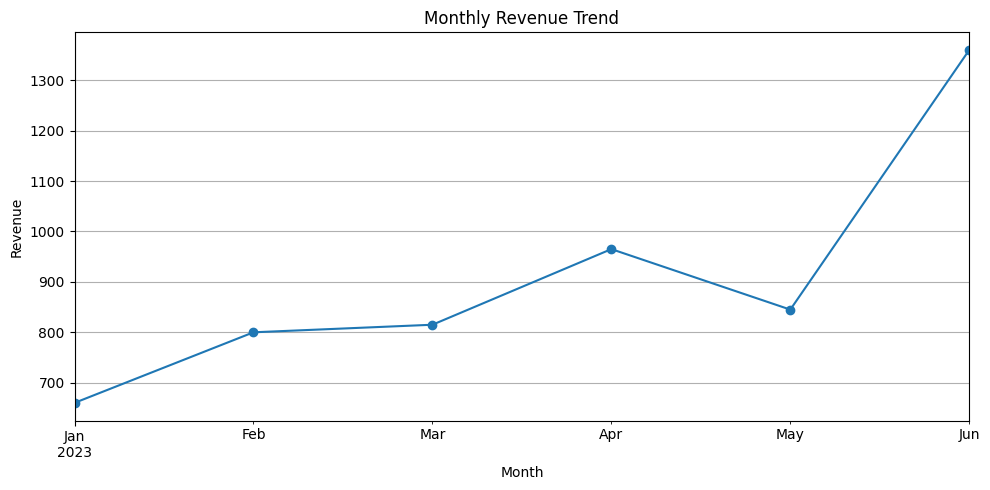

In [8]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Revenue Trend', figsize=(10,5))
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-558114048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


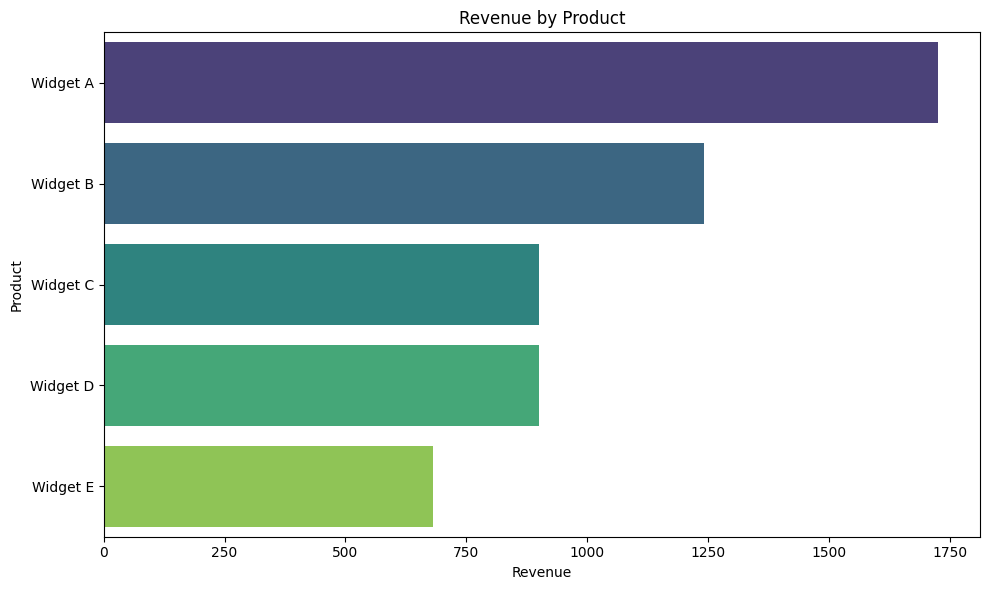

In [9]:
import seaborn as sns

product_sales = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Revenue by Product')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


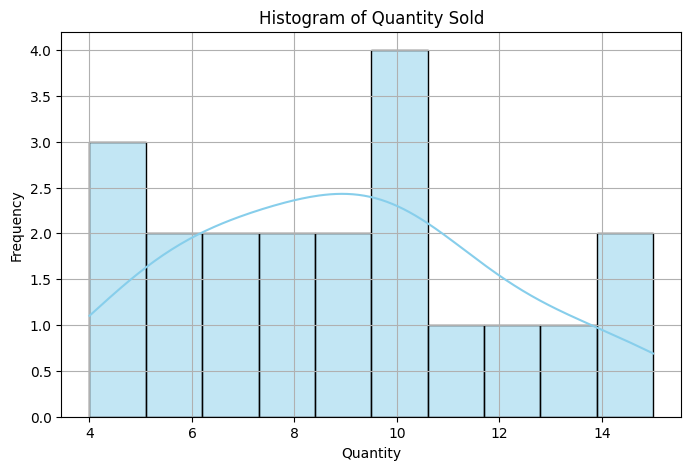

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


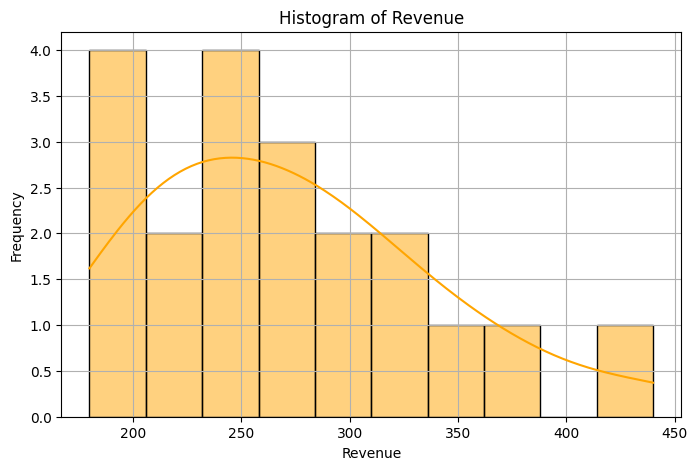

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Revenue'], bins=10, kde=True, color='orange')
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
